In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import random as random
from sklearn import linear_model

In [3]:
# Import and visualize the data
raw_data = np.genfromtxt('data/client_performance.csv', delimiter=";", dtype=float, encoding="utf-8-sig")
number_of_measurements = len(raw_data[0])


# Settings
min_history = 4
max_history = 5

# Format the data into feature and values
data = []

# Data array will contain data from each history length
for history_length in range(min_history + 1, max_history + 2):
    history_data = []
    for measurement in range(number_of_measurements):
        measurement_data = raw_data[:, measurement]
        for value_to_predict in range(history_length, len(measurement_data)):
            history_data.append(measurement_data[value_to_predict - history_length:value_to_predict])
    # Shuffle the data points (vectors, not individual measurements!)
    random.shuffle(history_data)
    data.append(history_data)

In [4]:
# Format the data into feature and values
# Settings
min_history = 2
max_history = 5

# Data array will contain data from each history length
data = []

for history_length in range(min_history + 1, max_history + 2):
    history_data = []
    for measurement in range(number_of_measurements):
        measurement_data = raw_data[:, measurement]
        for value_to_predict in range(history_length, len(measurement_data)):
            history_data.append(measurement_data[value_to_predict - history_length:value_to_predict])
    data.append(history_data)

In [5]:
def autocorrellation(data_vector, lag):
    sum = 0
    for k in range(len(data_vector)):
        sum += data_vector[k] * data_vector[k - lag]
    return sum / len(data_vector)


def calculate_weights(data_matrix):
    average_weights = [0] * len(data_matrix[0])

    for data_vector in data_matrix:
        n = len(data_vector)
        r_matrix = [[0] * n for i in range(n)]
        r_vector = [0] * n
        for i in range(n):
            for j in range(n):
                r_matrix[i][j] = autocorrellation(data_vector, np.abs(j - i))
            r_vector[i] = autocorrellation(data_vector, i + 1)

        weights = np.linalg.solve(r_matrix, r_vector)

        for i in range(n):
            average_weights[i] += weights[i]

    for i in range(len(data_matrix[0])):
        average_weights[i] = average_weights[i] / len(data_matrix)

    return average_weights


def predict(data_set, w):
    predictions = []

    for data_row in data_set:
        prediction = 0
        for i in range(len(data_row)):
            prediction += data_row[i] * w[i]
        predictions.append(prediction)

    return predictions

History is  2
M1 Average error is 0.000000 (0.000000%)
M2 Average error is 2088.550347 (5.006325%)
History is  3
M1 Average error is 0.000000 (0.000000%)
M2 Average error is 2232.655372 (5.353693%)
History is  4
M1 Average error is 0.000000 (0.000000%)
M2 Average error is 2101.084892 (5.039142%)
History is  5
M1 Average error is 0.000000 (0.000000%)
M2 Average error is 2131.197410 (5.108157%)


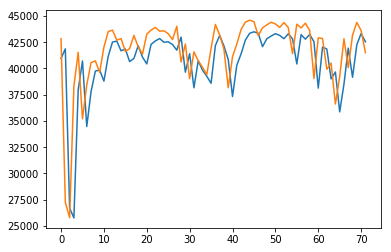

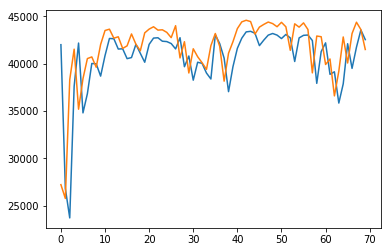

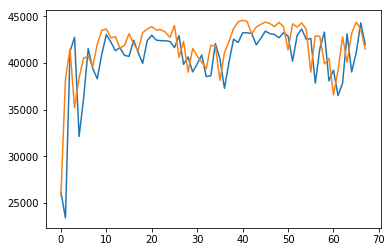

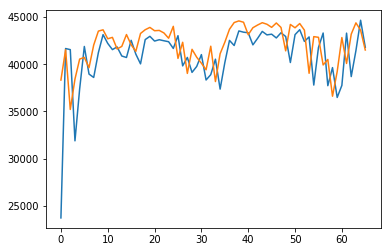

In [6]:
# Learning with Linear Regression
training_percentage = 0.5

for data_set in data:
    cutting_point = math.floor(len(data_set) * training_percentage)
    training_set = np.asarray(data_set[:cutting_point])
    validation_set = np.asarray(data_set[cutting_point:])
    value_column = len(training_set[0]) - 1

    # Linear predictor with statistical weights
    w = calculate_weights(training_set)
    m1_prediction = predict(validation_set, w)

    # Linear Regression model
    model = linear_model.LinearRegression()
    model.fit(training_set[:, list(range(0, value_column))], training_set[:, value_column])
    m2_prediction = model.predict(validation_set[:, list(range(0, value_column))])

    # Print the accuracy
    m1_sum_error = 0
    m2_sum_error = 0
    sum_data = 0
    for i in range(len(validation_set)):
        m1_sum_error += math.fabs(m1_prediction[i] - validation_set[i][value_column])
        m2_sum_error += math.fabs(m2_prediction[i] - validation_set[i][value_column])
        sum_data += validation_set[i][0]

    m1_average_error = m1_sum_error / len(validation_set)
    m2_average_error = m2_sum_error / len(validation_set)
    average_data = sum_data / len(validation_set)

    print("History is ", len(data_set[0]) - 1)
    print("M1 Average error is %f (%f%%)" % (m1_average_error, m1_average_error / average_data * 100))
    print("M2 Average error is %f (%f%%)" % (m2_average_error, m2_average_error / average_data * 100))

    # Plot the result
    fig = plt.figure()
    ax = plt.axes()
    x_validate = range(len(m2_prediction))

    # Plot predicted
    ax.plot(x_validate, m2_prediction)

    # Plot actual
    ax.plot(x_validate, validation_set[:, value_column])
